In [1]:
import pandas as pd
from sklearn.utils import shuffle

df = pd.read_csv(f"EnglishOrSpanish/output_joint1.csv")
df = shuffle(df)
df

,English,Spanish
31434,"[2, 361, 1220, 979, 272, 328, 224, 3, 0, 0, 0,...","[2, 302, 328, 745, 265, 2135, 265, 958, 224, 3..."
4210,"[2, 701, 6740, 224, 3, 0, 0, 0, 0, 0, 0, 0, 0,...","[2, 2187, 7301, 224, 3, 0, 0, 0, 0, 0, 0, 0, 0..."
38154,"[2, 575, 304, 2149, 328, 804, 224, 3, 0, 0, 0,...","[2, 328, 6552, 265, 321, 644, 224, 3, 0, 0, 0,..."
6026,"[2, 576, 2345, 224, 3, 0, 0, 0, 0, 0, 0, 0, 0,...","[2, 1368, 3457, 224, 3, 0, 0, 0, 0, 0, 0, 0, 0..."
18470,"[2, 270, 1056, 448, 8255, 224, 3, 0, 0, 0, 0, ...","[2, 328, 2816, 474, 5297, 224, 3, 0, 0, 0, 0, ..."
...,...,...
51305,"[2, 395, 449, 7510, 9745, 224, 3, 0, 0, 0, 0, ...","[2, 2434, 10370, 294, 7921, 224, 3, 0, 0, 0, 0..."
71408,"[2, 818, 1521, 265, 11859, 2489, 1057, 224, 3,...","[2, 311, 1308, 410, 2019, 4332, 7268, 224, 3, ..."
126632,"[2, 300, 1020, 18612, 370, 300, 2178, 1578, 39...","[2, 492, 18258, 14174, 1319, 438, 2523, 298, 3..."
72307,"[2, 300, 2337, 384, 585, 2579, 224, 3, 0, 0, 0...","[2, 321, 2055, 767, 573, 2722, 224, 3, 0, 0, 0..."


In [2]:
import ast

df["English"] = df["English"].apply(ast.literal_eval)
df["Spanish"] = df["Spanish"].apply(ast.literal_eval)
df

,English,Spanish
31434,"[2, 361, 1220, 979, 272, 328, 224, 3, 0, 0, 0,...","[2, 302, 328, 745, 265, 2135, 265, 958, 224, 3..."
4210,"[2, 701, 6740, 224, 3, 0, 0, 0, 0, 0, 0, 0, 0,...","[2, 2187, 7301, 224, 3, 0, 0, 0, 0, 0, 0, 0, 0..."
38154,"[2, 575, 304, 2149, 328, 804, 224, 3, 0, 0, 0,...","[2, 328, 6552, 265, 321, 644, 224, 3, 0, 0, 0,..."
6026,"[2, 576, 2345, 224, 3, 0, 0, 0, 0, 0, 0, 0, 0,...","[2, 1368, 3457, 224, 3, 0, 0, 0, 0, 0, 0, 0, 0..."
18470,"[2, 270, 1056, 448, 8255, 224, 3, 0, 0, 0, 0, ...","[2, 328, 2816, 474, 5297, 224, 3, 0, 0, 0, 0, ..."
...,...,...
51305,"[2, 395, 449, 7510, 9745, 224, 3, 0, 0, 0, 0, ...","[2, 2434, 10370, 294, 7921, 224, 3, 0, 0, 0, 0..."
71408,"[2, 818, 1521, 265, 11859, 2489, 1057, 224, 3,...","[2, 311, 1308, 410, 2019, 4332, 7268, 224, 3, ..."
126632,"[2, 300, 1020, 18612, 370, 300, 2178, 1578, 39...","[2, 492, 18258, 14174, 1319, 438, 2523, 298, 3..."
72307,"[2, 300, 2337, 384, 585, 2579, 224, 3, 0, 0, 0...","[2, 321, 2055, 767, 573, 2722, 224, 3, 0, 0, 0..."


In [3]:
import torch
from torch.utils.data import DataLoader, TensorDataset

train_data = TensorDataset(
    torch.tensor(df["English"][:100000].tolist(), dtype=torch.long),
    torch.tensor(df["Spanish"][:100000].tolist(), dtype=torch.long),
)
test_data = TensorDataset(
    torch.tensor(df["English"][100000:].tolist(), dtype=torch.long),
    torch.tensor(df["Spanish"][100000:].tolist(), dtype=torch.long),
)
train_loader = DataLoader(train_data, batch_size=256, shuffle=True, drop_last=True)
test_loader = DataLoader(test_data, batch_size=256, shuffle=False, drop_last=True)

In [4]:
import json

with open(f"EnglishOrSpanish/vocab.json", "r") as f:
    vocab = json.load(f)

In [66]:
import torch
import torch.nn as nn


class Encoder(nn.Module):
    def __init__(
        self, vocab_size, embedding_dim, hidden_size, num_layers=2, dropout=0.3
    ):
        super(Encoder, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.vocab_size = vocab_size

        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)
        self.lstm = nn.LSTM(
            embedding_dim,
            hidden_size,
            num_layers=num_layers,
            batch_first=True,
            bidirectional=True,
            dropout=dropout,
        )
        self.dropout = nn.Dropout(dropout)

        self.apply(self._init_weights)

    def _init_weights(self, module):
        if isinstance(module, nn.LSTM):
            for name, param in module.named_parameters():
                if "weight" in name:
                    nn.init.xavier_uniform_(param)
                elif "bias" in name:
                    nn.init.zeros_(param)

    def forward(self, x):
        embedded = self.dropout(self.embedding(x))
        output, (hidden, cell) = self.lstm(embedded)
        return output, hidden, cell

In [67]:
class Attention(nn.Module):
    def __init__(self, hidden_size):
        super(Attention, self).__init__()
        self.hidden_size = hidden_size

        self.W1 = nn.Linear(hidden_size, hidden_size)
        self.W2 = nn.Linear(hidden_size * 2, hidden_size)
        self.v = nn.Linear(hidden_size, 1, bias=False)

    def forward(self, hidden, enc_out):
        hidden = hidden.unsqueeze(1)
        score = self.v(torch.tanh(self.W1(hidden) + self.W2(enc_out)))
        attention_weights = torch.softmax(score, dim=1)
        context_vector = torch.sum(attention_weights * enc_out, dim=1)
        return context_vector, attention_weights

In [68]:
import torch
import torch.nn as nn


class Decoder(nn.Module):
    def __init__(
        self, vocab_size, embedding_dim, hidden_size, num_layers=2, dropout=0.3
    ):
        super(Decoder, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.vocab_size = vocab_size

        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)

        self.lstm = nn.LSTM(
            embedding_dim + hidden_size * 2,
            hidden_size,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout,
            bidirectional=True,
        )
        self.fc = nn.Linear(hidden_size * 2, vocab_size)
        self.dropout = nn.Dropout(dropout)
        self.attention = Attention(hidden_size)
        self.apply(self._init_weights)

    def _init_weights(self, module):
        if isinstance(module, nn.LSTM):
            for name, param in module.named_parameters():
                if "weight" in name:
                    nn.init.xavier_uniform_(param)
                elif "bias" in name:
                    nn.init.zeros_(param)

    def forward(self, x, hidden, cell, enc_out):
        attention_vector, _ = self.attention(hidden[0], enc_out)
        x = self.embedding(x)
        x = torch.cat((attention_vector, x), dim=-1)
        x = x.unsqueeze(1)
        output, (hidden, cell) = self.lstm(x, (hidden, cell))
        output = self.dropout(output)
        output = self.fc(output)
        return output, hidden, cell

In [69]:
import torch.nn as nn
import torch
import random

class Seq2Seq(nn.Module):
    def __init__(self, encoder, decoder, vocab_size, teacher_forcing_ratio=0.5):
        super(Seq2Seq, self).__init__()
        self.encoder = encoder
        self.decoder = decoder
        self.vocab_size = vocab_size
        self.teacher_forcing_ratio = teacher_forcing_ratio

    def forward(self, src, trg):
        enc_out, hidden, cell = self.encoder(src)
        outputs = torch.zeros(trg.shape[0], trg.shape[1], self.decoder.vocab_size).to("cuda")
        x = trg[:, 0]
        for t in range(1, trg.shape[1]):
            output, hidden, cell = self.decoder(x, hidden, cell, enc_out)
            output = output.squeeze(1)
            outputs[:, t, :] = output
            use_teacher_forcing = random.random() < self.teacher_forcing_ratio
            x = trg[:, t] if use_teacher_forcing else output.argmax(dim=1)

        return outputs
    
    def predict(self, src):
        enc_out, hidden, cell = self.encoder(src)
        outputs = torch.zeros(src.shape[0], src.shape[1], self.decoder.vocab_size).to("cuda")
        x = src[:, 0]
        for i in range(1, src.shape[1]):
            output, hidden, cell = self.decoder(x, hidden, cell, enc_out)
            output = output.squeeze(1)
            outputs[:, i, :] = output
            x = output.argmax(dim=1)
        
        return outputs

In [ ]:
from torch.utils.tensorboard import SummaryWriter
from tqdm import tqdm

def train(
        model,
        train_loader,
        test_loader,
        optimizer,
        criterion,
        device,
        scheduler, 
        num_epochs,
    ):
    writer = SummaryWriter()

    for epoch in range(num_epochs):
        print(f"\nEpoch {epoch+1}/{num_epochs}")
        model.train()
        epoch_loss = 0
        progress_bar = tqdm(train_loader, desc="Training", leave=False)

        for src, trg in progress_bar:
            src, trg = src.to(device), trg.to(device)
            optimizer.zero_grad()
            outputs = model(src, trg)
            loss = criterion(
                    outputs[:, 1:].reshape(-1, model.vocab_size), trg[:, 1:].reshape(-1)
                )
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()

            progress_bar.set_postfix(
                    loss=f"{loss.item():.4f}"
                )

        train_loss = epoch_loss / len(train_loader)

        # ---------------- VALIDATION ---------------- #
        model.eval()
        val_epoch_loss = 0
        progress_bar = tqdm(test_loader, desc="Validating", leave=False)

        with torch.no_grad():
            for src, trg in progress_bar:
                src, trg = src.to(device), trg.to(device)
                outputs = model(src, trg)
                loss = criterion(
                        outputs[:, 1:].reshape(-1, model.vocab_size),
                        trg[:, 1:].reshape(-1),
                    )
                val_epoch_loss += loss.item()

                progress_bar.set_postfix(
                        loss=f"{loss.item():.4f}"
                    )

        val_loss = val_epoch_loss / len(test_loader)
        scheduler.step(val_loss)

        # Log metrics to TensorBoard
        writer.add_scalar("Loss/Train", train_loss, epoch)
        writer.add_scalar("Loss/Validation", val_loss, epoch)
        writer.add_scalar("Learning Rate", scheduler.get_last_lr()[0], epoch)

        print(
            f"Train loss : {train_loss}, Val_loss : {val_loss}, lr: {scheduler.get_last_lr()[0]}"
        )

    writer.close()
    return train_loss, val_loss

2025-03-23 00:06:16.804905: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-23 00:06:16.826606: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742668576.857692   10912 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742668576.864500   10912 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-23 00:06:16.887164: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

vocab_size = len(vocab)
embedding_dim = 256
hidden_size = 64
encoder = Encoder(vocab_size, embedding_dim, hidden_size).to(device)
decoder = Decoder(vocab_size, embedding_dim, hidden_size).to(device)
seq2seq = Seq2Seq(encoder, decoder, vocab_size).to(device)
criterion = nn.CrossEntropyLoss(ignore_index=0)
optimizer = optim.Adam(seq2seq.parameters(), lr=0.005, weight_decay=1e-5)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode="min", factor=0.5, patience=2
)

In [12]:
import torch
import torch.nn.functional as F
from tqdm import tqdm

train(
    seq2seq,
    train_loader,
    test_loader,
    optimizer,
    criterion,
    device,
    scheduler,
    60,
)


Epoch 1/60


Train loss : 5.398456978186583, Val_loss : 4.6444296077289415, lr: 0.005

Epoch 2/60


Train loss : 4.4553677999056305, Val_loss : 4.00223692328529, lr: 0.005

Epoch 3/60


Train loss : 3.9469068808433336, Val_loss : 3.54923131191625, lr: 0.005

Epoch 4/60


Train loss : 3.557183112242283, Val_loss : 3.2092477220349607, lr: 0.005

Epoch 5/60


Train loss : 3.2803707153369217, Val_loss : 2.9788911722402656, lr: 0.005

Epoch 6/60


Train loss : 3.066326252008096, Val_loss : 2.7927831021030394, lr: 0.005

Epoch 7/60


Train loss : 2.910721849783873, Val_loss : 2.680024222990053, lr: 0.005

Epoch 8/60


Train loss : 2.81575026451013, Val_loss : 2.581795133320631, lr: 0.005

Epoch 9/60


Train loss : 2.715116331516168, Val_loss : 2.53244538222794, lr: 0.005

Epoch 10/60


Train loss : 2.6516647008749157, Val_loss : 2.482578079257391, lr: 0.005

Epoch 11/60


Train loss : 2.6027147244184445, Val_loss : 2.415061994991471, lr: 0.005

Epoch 12/60


Train loss : 2.548879899734106, Val_loss : 2.4120212761701736, lr: 0.005

Epoch 13/60


Train loss : 2.520582443017226, Val_loss : 2.3966853703017783, lr: 0.005

Epoch 14/60


Train loss : 2.4777613853796936, Val_loss : 2.3741126482465624, lr: 0.005

Epoch 15/60


Train loss : 2.459987807885194, Val_loss : 2.3373464272085545, lr: 0.005

Epoch 16/60


Train loss : 2.435475818316142, Val_loss : 2.306995743143875, lr: 0.005

Epoch 17/60


Train loss : 2.412485931775509, Val_loss : 2.3356082165135748, lr: 0.005

Epoch 18/60


Train loss : 2.3796257553956446, Val_loss : 2.278501580246782, lr: 0.005

Epoch 19/60


Train loss : 2.35996735676741, Val_loss : 2.292058798064173, lr: 0.005

Epoch 20/60


Train loss : 2.3498346264545735, Val_loss : 2.2519915874025465, lr: 0.005

Epoch 21/60


Train loss : 2.341459852609879, Val_loss : 2.2702632625546078, lr: 0.005

Epoch 22/60


Train loss : 2.312810076811375, Val_loss : 2.23373059044897, lr: 0.005

Epoch 23/60


Train loss : 2.298126581387642, Val_loss : 2.2353562644097655, lr: 0.005

Epoch 24/60


Train loss : 2.2933347200736023, Val_loss : 2.2261213612767445, lr: 0.005

Epoch 25/60


Train loss : 2.2864191724703864, Val_loss : 2.2349064371227163, lr: 0.005

Epoch 26/60


Train loss : 2.2628605836477034, Val_loss : 2.2169263025300694, lr: 0.005

Epoch 27/60


Train loss : 2.254252044359843, Val_loss : 2.2322471120716196, lr: 0.005

Epoch 28/60


Train loss : 2.2509205555304503, Val_loss : 2.1964069900259506, lr: 0.005

Epoch 29/60


Train loss : 2.225737711099478, Val_loss : 2.1975157461335173, lr: 0.005

Epoch 30/60


Train loss : 2.2376599917045006, Val_loss : 2.195589998127085, lr: 0.005

Epoch 31/60


Train loss : 2.2149676533845755, Val_loss : 2.197866728875489, lr: 0.005

Epoch 32/60


Train loss : 2.2185200058496917, Val_loss : 2.184984509923817, lr: 0.005

Epoch 33/60


Train loss : 2.203610423283699, Val_loss : 2.1883838102880833, lr: 0.005

Epoch 34/60


Train loss : 2.2014743129412335, Val_loss : 2.177044713391667, lr: 0.005

Epoch 35/60


Train loss : 2.1831682358032616, Val_loss : 2.2099141789748606, lr: 0.005

Epoch 36/60


Train loss : 2.2014468706571138, Val_loss : 2.19014001209124, lr: 0.005

Epoch 37/60


Train loss : 2.1592295658894076, Val_loss : 2.155659317970276, lr: 0.005

Epoch 38/60


Train loss : 2.161361927863879, Val_loss : 2.1386252747172803, lr: 0.005

Epoch 39/60


Train loss : 2.1684206968698745, Val_loss : 2.1441068332807154, lr: 0.005

Epoch 40/60


Train loss : 2.1643929671018554, Val_loss : 2.1469616668414226, lr: 0.005

Epoch 41/60


Train loss : 2.1527476237370418, Val_loss : 2.1505478462286756, lr: 0.0025

Epoch 42/60


Train loss : 2.015419987531809, Val_loss : 2.072085740291967, lr: 0.0025

Epoch 43/60


Train loss : 1.9561490538792732, Val_loss : 2.0557947728486186, lr: 0.0025

Epoch 44/60


Train loss : 1.9460854588410794, Val_loss : 2.057917602294314, lr: 0.0025

Epoch 45/60


Train loss : 1.9291170349487892, Val_loss : 2.0479225795880884, lr: 0.0025

Epoch 46/60


Train loss : 1.9242138865666512, Val_loss : 2.0628936121949053, lr: 0.0025

Epoch 47/60


Train loss : 1.9133011976877847, Val_loss : 2.0802281493634247, lr: 0.0025

Epoch 48/60


Train loss : 1.9215977087999, Val_loss : 2.098077142133122, lr: 0.00125

Epoch 49/60


Train loss : 1.8279445061316857, Val_loss : 2.046991122507416, lr: 0.00125

Epoch 50/60


Train loss : 1.7998924655792041, Val_loss : 2.042541569313117, lr: 0.00125

Epoch 51/60


Train loss : 1.7717543660066066, Val_loss : 2.022099302933279, lr: 0.00125

Epoch 52/60


Train loss : 1.7613182388819182, Val_loss : 2.037732826924957, lr: 0.00125

Epoch 53/60


Train loss : 1.7684732715288798, Val_loss : 2.04855791340887, lr: 0.00125

Epoch 54/60


Train loss : 1.7664343745280535, Val_loss : 2.0461571132187295, lr: 0.000625

Epoch 55/60


Train loss : 1.7181421506099213, Val_loss : 2.0080356313064036, lr: 0.000625

Epoch 56/60


Train loss : 1.70082893432715, Val_loss : 2.007900820369214, lr: 0.000625

Epoch 57/60


Train loss : 1.6974349764677195, Val_loss : 2.0174991462082987, lr: 0.000625

Epoch 58/60


Train loss : 1.6741172179197654, Val_loss : 2.012294535088328, lr: 0.0003125

Epoch 59/60


Train loss : 1.6385820404077187, Val_loss : 2.0219949842554277, lr: 0.0003125

Epoch 60/60


Train loss : 1.6478714777873114, Val_loss : 2.018457844194058, lr: 0.0003125


(1.6478714777873114, 2.018457844194058)

In [13]:
torch.save(seq2seq.state_dict(), "seq2seq-bidir-attention.pth")

# Evaluation

In [70]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

vocab_size = len(vocab)
embedding_dim = 256
hidden_size = 64
encoder = Encoder(vocab_size, embedding_dim, hidden_size).to(device)
decoder = Decoder(vocab_size, embedding_dim, hidden_size).to(device)
seq2seq = Seq2Seq(encoder, decoder, vocab_size).to(device)
seq2seq.load_state_dict(torch.load("seq2seq-bidir-attention.pth", weights_only=True))

<All keys matched successfully>

In [71]:
seq2seq.eval()
# with torch.no_grad():
a, b = next(iter(test_loader))
a = a.to(device)
b = b.to(device)
with torch.no_grad():
    x = seq2seq.predict(a)

x = x.argmax(dim=2)
x.shape

torch.Size([256, 18])

In [72]:
from tokenizers import ByteLevelBPETokenizer
tokenizer = ByteLevelBPETokenizer(
    f"EnglishOrSpanish/vocab.json", f"EnglishOrSpanish/merges.txt"
)

In [73]:
x = x.cpu().numpy()
b = b.cpu().numpy()
a = a.cpu().numpy()
preds = []
targets = []
originals = []
for i in range(x.shape[0]):
    preds.append(tokenizer.decode(x[i]))
    targets.append(tokenizer.decode(b[i]))
    originals.append(tokenizer.decode(a[i]))

In [76]:
import pandas as pd

df = pd.DataFrame({"Original": originals[:10], "Prediction": preds[:10], "Target": targets[:10]})
df.to_csv("attention-bidir.csv", index=False)
df

,Original,Prediction,Target
0,<SOS> so tom what can i do for you today <EOS>...,<PAD> así que tom qué puedo hacer por hoy <EOS...,<SOS> así que tom qué puedo hacer hoy por ti <...
1,<SOS> he has a camera <EOS><PAD><PAD><PAD><PAD...,<PAD> él tiene una cámara <EOS><EOS><EOS><EOS>...,<SOS> él tiene una cámara <EOS><PAD><PAD><PAD>...
2,<SOS> everybody admired his courage <EOS><PAD>...,<PAD> todos los mundo su su valor <EOS><EOS><E...,<SOS> todo el mundo admiraba su coraje <EOS><P...
3,<SOS> i havent found my keys yet <EOS><PAD><PA...,<PAD> todavía no he encontrado mis llaves <EOS...,<SOS> todavía no he encontrado mis llaves <EOS...
4,<SOS> where exactly is tom <EOS><PAD><PAD><PAD...,<PAD> dónde está exactamente tom <EOS><EOS><EO...,<SOS> dónde está exactamente tom <EOS><PAD><PA...
5,<SOS> what are you going to see <EOS><PAD><PAD...,<PAD> qué vas a ver <EOS><EOS><EOS><EOS><EOS><...,<SOS> qué vais a ver <EOS><PAD><PAD><PAD><PAD>...
6,<SOS> i dont know if youll be here when i retu...,<PAD> no sé si estarás aquí cuando vuelva <EOS...,<SOS> no sé si estarás aquí cuando vuelva <EOS...
7,<SOS> im going to tell you everything <EOS><PA...,<PAD> te voy a decir todo <EOS><EOS><EOS><EOS>...,<SOS> te lo voy a contar todo <EOS><PAD><PAD><...
8,<SOS> do you snore <EOS><PAD><PAD><PAD><PAD><P...,<PAD> tú <EOS><EOS><EOS><EOS><EOS><EOS><EOS><...,<SOS> tú roncas <EOS><PAD><PAD><PAD><PAD><PAD>...
9,<SOS> i love kids <EOS><PAD><PAD><PAD><PAD><PA...,<PAD> me encantan los niños <EOS><EOS><EOS><EO...,<SOS> me encantan los niños <EOS><PAD><PAD><PA...


In [ ]:
import sacrebleu

def calculate_bleu_score(preds, targets):
    bleu = sacrebleu.corpus_bleu(
        preds, [targets], force=True
    )
    return bleu.score


calculate_bleu_score(preds, targets)

27.67598470386799

In [13]:
import rouge

rouge = rouge.Rouge()
scores = rouge.get_scores(preds, targets, avg=True)
scores

{'rouge-1': {'r': 0.5297945231596426,
  'p': 0.5543545538662722,
  'f': 0.540189756660357},
 'rouge-2': {'r': 0.3669931197274949,
  'p': 0.3761023590125156,
  'f': 0.37077918330939874},
 'rouge-l': {'r': 0.5218424855373384,
  'p': 0.5452970423673544,
  'f': 0.5317817493086623}}

In [14]:
def ter(preds, targets):
    return sacrebleu.corpus_ter(preds, [targets]).score


ter(preds, targets)

49.0272373540856

# Visualizing attention weights

In [7]:
import torch
import torch.nn as nn


class Decoder(nn.Module):
    def __init__(
        self, vocab_size, embedding_dim, hidden_size, num_layers=2, dropout=0.3
    ):
        super(Decoder, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.vocab_size = vocab_size

        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)

        self.lstm = nn.LSTM(
            embedding_dim + hidden_size * 2,
            hidden_size,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout,
            bidirectional=True,
        )
        self.fc = nn.Linear(hidden_size * 2, vocab_size)
        self.dropout = nn.Dropout(dropout)
        self.attention = Attention(hidden_size)
        self.apply(self._init_weights)

    def _init_weights(self, module):
        if isinstance(module, nn.LSTM):
            for name, param in module.named_parameters():
                if "weight" in name:
                    nn.init.xavier_uniform_(param)
                elif "bias" in name:
                    nn.init.zeros_(param)

    def forward(self, x, hidden, cell, enc_out):
        attention_vector, attention_weights = self.attention(hidden[0], enc_out)
        x = self.embedding(x)
        x = torch.cat((attention_vector, x), dim=-1)
        x = x.unsqueeze(1)
        output, (hidden, cell) = self.lstm(x, (hidden, cell))
        output = self.dropout(output)
        output = self.fc(output)
        return output, hidden, cell, attention_weights


class Seq2Seq(nn.Module):
    def __init__(self, encoder, decoder, vocab_size, teacher_forcing_ratio=0.5):
        super(Seq2Seq, self).__init__()
        self.encoder = encoder
        self.decoder = decoder
        self.vocab_size = vocab_size
        self.teacher_forcing_ratio = teacher_forcing_ratio

    def forward(self, src, trg):
        enc_out, hidden, cell = self.encoder(src)
        outputs = torch.zeros(trg.shape[0], trg.shape[1], self.decoder.vocab_size).to(
            "cuda"
        )
        x = trg[:, 0]
        for t in range(1, trg.shape[1]):
            output, hidden, cell = self.decoder(x, hidden, cell, enc_out)
            output = output.squeeze(1)
            outputs[:, t, :] = output
            use_teacher_forcing = random.random() < self.teacher_forcing_ratio
            x = trg[:, t] if use_teacher_forcing else output.argmax(dim=1)

        return outputs

    def predict(self, src):
        enc_out, hidden, cell = self.encoder(src)
        outputs = torch.zeros(src.shape[0], src.shape[1], self.decoder.vocab_size).to(
            "cuda"
        )
        attentions = []
        x = src[:, 0]
        for i in range(1, src.shape[1]):
            output, hidden, cell, attention_weights = self.decoder(x, hidden, cell, enc_out)
            output = output.squeeze(1)
            outputs[:, i, :] = output
            x = output.argmax(dim=1)
            attentions.append(attention_weights.squeeze(0).cpu().detach().numpy())  

        return outputs, attentions

In [8]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

vocab_size = len(vocab)
embedding_dim = 256
hidden_size = 64
encoder = Encoder(vocab_size, embedding_dim, hidden_size).to(device)
decoder = Decoder(vocab_size, embedding_dim, hidden_size).to(device)
seq2seq = Seq2Seq(encoder, decoder, vocab_size).to(device)
seq2seq.load_state_dict(torch.load("seq2seq-bidir-attention.pth", weights_only=True))

<All keys matched successfully>

In [61]:
seq2seq.eval()
# with torch.no_grad():
a, b = next(iter(test_loader))
a, b = a[0], b[0]
a, b = a.unsqueeze(0).to(device), b.unsqueeze(0).to(device)
with torch.no_grad():
    x, attention_matrices = seq2seq.predict(a)

x = x.argmax(dim=2)
x.shape

torch.Size([1, 18])

In [62]:
from tokenizers import ByteLevelBPETokenizer

tokenizer = ByteLevelBPETokenizer(
    f"EnglishOrSpanish/vocab.json", f"EnglishOrSpanish/merges.txt"
)
x = x.cpu().numpy()
a = a.cpu().numpy()
preds = []
targets = []
for i in range(x.shape[0]):
    preds.append(tokenizer.decode(x[i]))
    targets.append(tokenizer.decode(a[i]))

In [63]:
preds, targets

(['<PAD> así que tom qué puedo hacer por hoy <EOS><EOS><EOS><EOS><EOS><EOS><EOS><EOS>'],
 ['<SOS> so tom what can i do for you today <EOS><PAD><PAD><PAD><PAD><PAD><PAD>'])

In [64]:
import numpy as np

input_words = preds[0].split()[1:-1]
output_words = targets[0].split()[1:-1]
attention_matrices = np.array(attention_matrices)[
    1 : len(input_words) + 1, 1 : len(output_words) + 1, 0
].T
attention_matrices.shape

(9, 8)

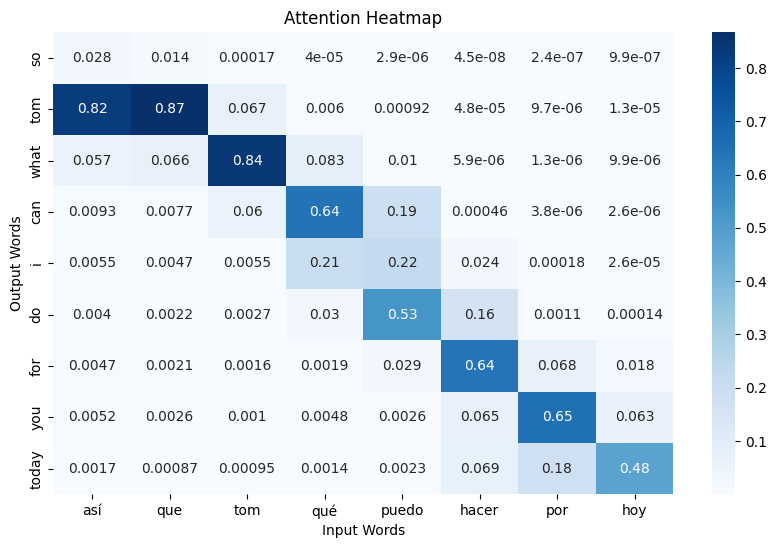

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


def plot_attention(attention, input_words, output_words):
    fig, ax = plt.subplots(figsize=(10, 6))
    attention = np.array(attention)
    sns.heatmap(
        attention,
        xticklabels=input_words,
        yticklabels=output_words,
        cmap="Blues",
        annot=True,
    )

    plt.xlabel("Input Words")
    plt.ylabel("Output Words")
    plt.title("Attention Heatmap")
    plt.show()


plot_attention(attention_matrices, input_words, output_words)